# Image Recognition Model

## Importing libraries

In [2]:
import tensorflow.compat.v1 as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.utils import np_utils
import h5py


# old version of tensorflow
tf.disable_v2_behavior()

W0527 14:10:30.503160  8032 deprecation.py:323] From c:\program files\python36\lib\site-packages\tensorflow_core\python\compat\v2_compat.py:88: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


## Creating Model

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense((512), activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(.5))
model.add(Dense(10, activation="softmax"))

# compile model
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])


W0527 14:14:24.836954  8032 deprecation.py:506] From c:\program files\python36\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1635: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Visualizing Model

In [18]:
for i in model.layers:
    print(i.input_shape[1:])

(32, 32, 3)
(32, 32, 32)
(16, 16, 32)
(8192,)
(512,)
(512,)


<IPython.core.display.Javascript object>


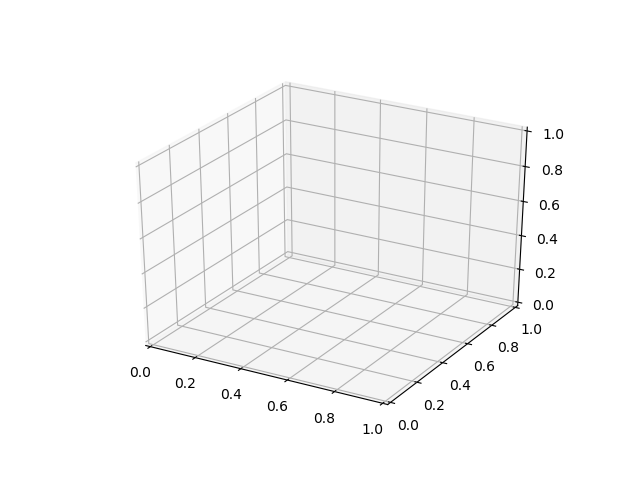

TypeError: 'int' object is not iterable

In [43]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

def ntol(sx=1,sy=1,sz=1):
    x = [i for i in range(sx)]
    x1 = []
    for i in x:
        for j in len(x):
            x1.append(i)
    print(x1)
    y = [i for i in range(sy)]
    z = [i for i in np.ones((sx))]
    return x,y,z

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x,y,z = ntol(3, 3, 3)
ax.scatter(x, z, y, c='r', marker='o')

print(x, end='\n#####################\n\n')
print(y, end='\n#####################\n\n')
print(z, end='\n#####################\n\n')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

<IPython.core.display.Javascript object>


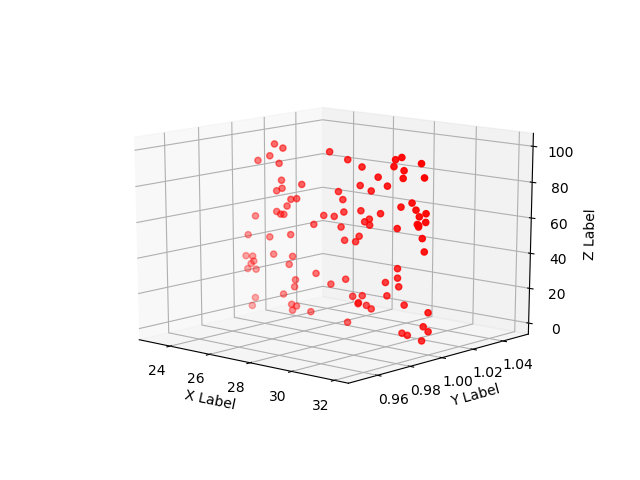

[30.59477048 29.20202941 28.78241881 30.79840717 25.43457912 23.17775177
 28.1518827  29.06147066 27.83124454 27.70281782 31.75688731 25.65340009
 25.00746647 25.36343397 27.91586248 29.29688595 25.57350692 31.49366962
 30.03062206 31.49199895 31.5222511  30.69115683 26.4970311  30.85767253
 28.70287049 30.50242021 31.81862394 28.14798759 24.28746763 23.45507559
 24.32143921 31.68999011 30.76645786 29.59372522 23.51786119 26.6020407
 27.96573662 26.98626079 23.05498959 24.92569592 23.57065337 30.3290265
 29.96616067 24.47649112 23.71972961 26.33710235 30.0397505  31.18024853
 31.01955394 28.829152   23.35403303 30.40131852 23.31433118 25.4171099
 24.90020046 24.65302867 23.13887245 25.17169714 28.66027062 31.36573165
 30.67045178 30.5360596  28.00219406 23.39972767 28.96371635 28.86217296
 25.34301387 27.2763735  24.7866134  28.05665054 28.53426244 25.52650439
 30.53101493 25.61878365 28.39927491 28.74530804 29.7147007  29.18745933
 31.66751872 27.33490718 25.3734327  31.97524707 24.56

In [35]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
# for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
xs = randrange(n, 23, 32)
ys = randrange(n, 1, 1)
zs = randrange(n, 0, 100)
ax.scatter(xs, ys, zs, c='r', marker='o')

print(xs, end='\n#####################\n\n')
print(ys, end='\n#####################\n\n')
print(zs, end='\n#####################\n\n')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


## Data loading

### cifar-10 dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

new_X_train = X_train.astype('float32')
new_X_train /= 255
new_X_test = X_train.astype('float32')
new_X_test /= 255

new_Y_train = np_utils.to_categorical(y_train)
new_Y_test = np_utils.to_categorical(y_test)

## Train Model

In [ ]:
model.fit(new_X_train, new_Y_train, epochs=1, batch_size=32)

## Test Model
### Data loading

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
input_path = input('Enter image file path name: ')
input_image = Image.open(input_path)
input_image = input_image.resize((32, 32), resample=Image.LANCZOS)
input_array = np.array(input_image)
input_array = input_array.astype('float32')
input_array /= 255.0
input_array = input_array.resize(1, 32, 32, 3)
input_image.show()

# prediction
answer = model.predict(input_array)
print(labels[np.argmax(answer)])